In [1]:
import sys
sys.path.append('./')
sys.path.append('./biovec')
from helpers import nGram, DfVec

In [2]:
import biovec
seq='MAKKSMIAKQKRTPKFKVQEYTRCER'
biovec.models.split_ngrams(seq,3)

[['MAK', 'KSM', 'IAK', 'QKR', 'TPK', 'FKV', 'QEY', 'TRC'],
 ['AKK', 'SMI', 'AKQ', 'KRT', 'PKF', 'KVQ', 'EYT', 'RCE'],
 ['KKS', 'MIA', 'KQK', 'RTP', 'KFK', 'VQE', 'YTR', 'CER']]

In [3]:
import pandas as pd
import numpy as np
infile = 'protVec_100d_3grams.csv'
df = pd.read_csv(infile,delimiter=' ',header=None)#index_col=[0] 
df[0][0]=="AAA"

True

In [4]:
from gensim.models import word2vec
from Bio import SeqIO
import sys
from gensim.models import word2vec


def split_ngrams(seq, n):
    """
    'AGAMQSASM' => [['AGA', 'MQS', 'ASM'], ['GAM','QSA'], ['AMQ', 'SAS']]
    """
    a, b, c = zip(*[iter(seq)]*n), zip(*[iter(seq[1:])]*n), zip(*[iter(seq[2:])]*n)
    str_ngrams = []
    for ngrams in [a,b,c]:
        x = []
        for ngram in ngrams:
            x.append("".join(ngram))
        str_ngrams.append(x)
    return str_ngrams

In [5]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_file=('protVec_100d_3grams.csv')
tmp_file=get_tmpfile('trial.txt')
x=glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

def tovecs(seq):
    
    sequence = split_ngrams(seq, 3)
    protvecs=[]
    
    for sn in sequence:
        ngram_vecs=[]
        for x in sn:
            try:
                ngram_vecs.append(model.get_vector(x))
            except:
                raise Exception("Model has never trained this n-gram: " + x)
        protvecs.append(sum(ngram_vecs))
    return sum(protvecs)
            



In [6]:
tovecs('MAKKSMIAKQKRTPKFKVQEYTRCER')

array([-2.09203005e-01,  3.33435982e-01,  1.47340059e-01, -9.21236038e-01,
       -2.90555954e-01, -2.05921888e-01,  1.08818913e+00,  2.85655022e-01,
       -1.20610702e+00,  9.57959056e-01,  8.82208347e-03,  5.67430258e-02,
        1.16716027e-01,  4.11549032e-01, -2.03400850e-03,  1.36503398e+00,
       -3.15410048e-02, -1.14978290e+00,  6.11533999e-01, -4.44157034e-01,
       -1.16117984e-01, -3.26674014e-01, -6.92801952e-01, -7.86531866e-01,
        1.35905057e-01,  1.37218595e+00,  1.48863077e-01, -6.81933045e-01,
       -9.59183037e-01, -3.92284989e-01, -7.77380943e-01, -9.29587960e-01,
        3.34003001e-01,  1.84699798e+00,  1.12115896e+00, -2.56535023e-01,
        1.35843706e+00, -1.70737028e-01, -2.09428012e-01, -1.84953034e-01,
        1.33703992e-01,  1.50450006e-01, -9.92136955e-01, -6.83079004e-01,
       -7.57839680e-02, -4.53465968e-01, -6.85459077e-01, -1.11027002e+00,
        1.12571023e-01,  1.43561900e+00, -7.29905069e-03, -1.16033804e+00,
        6.44268036e-01, -

In [7]:
infile = 'family_classification_metadata.tab'
add='family_classification_sequences.tab'

In [8]:
df = pd.read_csv(infile,delimiter='\t')
df['sequence'] = pd.read_csv(add,delimiter='\t')

In [9]:
df.head()

,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence
0,Q6GZX4,001R_FRG3G,Putative transcription factor 001R,Pox_VLTF3,Poxvirus Late Transcription Factor VLTF3 like,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...
1,Q6GZX3,002L_FRG3G,Uncharacterized protein 002L,DUF230,Poxvirus proteins of unknown function,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...
2,Q6GZX0,005R_FRG3G,Uncharacterized protein 005R,US22,US22 like,MQNPLPEVMSPEHDKRTTTPMSKEANKFIRELDKKPGDLAVVSDFV...
3,Q91G88,006L_IIV6,Putative KilA-N domain-containing protein 006L,DUF3627,Protein of unknown function (DUF3627),MDSLNEVCYEQIKGTFYKGLFGDFPLIVDKKTGCFNATKLCVLGGK...
4,Q197F3,007R_IIV3,Uncharacterized protein 007R,DUF2738,Protein of unknown function (DUF2738),MEAKNITIDNTTYNFFKFYNINQPLTNLKYLNSERLCFSNAVMGKI...


In [10]:
more1000=df['FamilyID'].value_counts()[:3].index.tolist()
indices=df[df['FamilyID'].isin(more1000)].index.values
df1000= df[df.index.isin(indices)]
df1000.head()

,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence
5,Q6GZW6,009L_FRG3G,Putative helicase 009L,Helicase_C,Helicase conserved C-terminal domain,MDTSPYDFLKLYPWLSRGEADKGTLLDAFPGETFEQSLASDVAMRR...
69,P32234,128UP_DROME,GTP-binding protein 128up,MMR_HSR1,50S ribosome-binding GTPase,MSTILEKISAIESEMARTQKNKATSAHLGLLKAKLAKLRRELISPK...
86,O55764,172L_IIV6,Putative helicase 172L,Helicase_C,Helicase conserved C-terminal domain,MADAMNELCNLTQHLQVDDDQLSNLKLKNGYSLFPHQEKVMLWMKY...
976,Q9J550,A18_FOWPN,Transcript termination protein A18,Helicase_C,Helicase conserved C-terminal domain,MSYITVIDDKLYSSLRKLVGYSPLYLFNDKGDFVEVMKNSEFRFLI...
986,Q9DHK3,A18_YLDV,Transcript termination protein A18,Helicase_C,Helicase conserved C-terminal domain,MSVCTEIDYKLYTELKKIAGNSLFLFNENGDFTEVVLNSSFKFLVP...


In [9]:
pv2 = biovec.models.load_protvec('trained_models/full.model')
pv2

In [12]:
#original
all_vectors=[]
i=0
    
for sequence in df1000['sequence']:

    try:
        vector = DfVec(sum(pv2.to_vecs(sequence)))#using trained model embedding
        all_vectors.append(vector) # split strings after whitespace

    except:
        vector=DfVec(np.zeros(250))
        all_vectors.append(vector)
        
print('number of proteins skipped: ',i)
     
df1000['Protein_vector'] = all_vectors # safe unique words in df

number of proteins skipped:  0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df1000

,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence,Protein_vector
70,P32234,128UP_DROME,GTP-binding protein 128up,TGS,TGS domain,MSTILEKISAIESEMARTQKNKATSAHLGLLKAKLAKLRRELISPK...,250 dimensional vector
72,Q8GBW6,12S_PROFR,Methylmalonyl-CoA carboxyltransferase 12S subunit,Carboxyl_trans,Carboxyl transferase domain,MAENNNLKLASTMEGRVEQLAEQRQVIEAGGGERRVEKQHSQGKQT...,250 dimensional vector
354,D3DJ41,2OCL_HYDTT,2-oxoglutarate carboxylase large subunit,HMGL-like,HMGL-like,MQAVEIMEEIREKFKEFEKGGFRKKILITDLTPRDGQQCKLATRVR...,250 dimensional vector
828,Q70AC7,5S_PROFR,Methylmalonyl-CoA carboxyltransferase 5S subunit,HMGL-like,HMGL-like,MSPREIEVSEPREVGITELVLRDAHQSLMATRMAMEDMVGACADID...,250 dimensional vector
1100,Q98514,A464_PBCV1,Putative protein A464R,Ribonuclease_3,Ribonuclease III domain,MENISKCMERGTTVGTMMVSERFKDQVQIPNTDDNFPEGPPSTKSG...,250 dimensional vector
...,...,...,...,...,...,...,...
322824,Q6GEP3,ZDH1_STAAR,Zinc-type alcohol dehydrogenase-like protein S...,ADH_zinc_N,Zinc-binding dehydrogenase,MKMIGFEKPFKLEEGNLFKVYEQRKPTPENDDILVKVNSISVNPVD...,250 dimensional vector
322825,Q6G7C8,ZDH1_STAAS,Zinc-type alcohol dehydrogenase-like protein S...,ADH_zinc_N,Zinc-binding dehydrogenase,MKMIGFEKPFKLEEGNLFKVYEQRKPTPENDDILVKVNSISVNPVD...,250 dimensional vector
322826,Q8NVD1,ZDH1_STAAW,Zinc-type alcohol dehydrogenase-like protein M...,ADH_zinc_N,Zinc-binding dehydrogenase,MKMIGFEKPFKLEEGNLFKVYEQRKPTPENDDILVKVNSISVNPVD...,250 dimensional vector
322827,Q5HM44,ZDH1_STAEQ,Zinc-type alcohol dehydrogenase-like protein S...,ADH_zinc_N,Zinc-binding dehydrogenase,MKAIGFKSSFQLDEGNCFEEFNFDIPHPSGHELLVKVQSISVNPVD...,250 dimensional vector


In [11]:

def tovecs(seq):
    
    sequence = split_ngrams(seq, 3)
    protvecs=[]
    
    for sn in sequence:
        ngram_vecs=[]
        for x in sn:
            try:
                ngram_vecs.append(model.get_vector(x))
            except:
                #raise Exception("Model has never trained this n-gram: " + x)
                ngram_vecs.append(np.zeros(100))#if it is not in csv file, it's rare-->skip
        protvecs.append(sum(ngram_vecs))
    return sum(protvecs)

allvectors=[]
i=0
    
for sequence in df['sequence']:
    try:

        vec = DfVec(tovecs(sequence))
        allvectors.append(vec) # split strings after whitespace
    except:
        allvectors.append(DfVec(np.zeros(100)))

     
df['Protein_vector'] = allvectors # safe unique words in df


In [12]:
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline

In [ ]:
from datetime import datetime
startTime = datetime.now()

pca_model = PCA(n_components=30,random_state=0)
tsne_model = TSNE(n_components=3, random_state=0,perplexity=30, n_iter=1000)
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform(vector_array))
print (datetime.now() - startTime)

In [ ]:
df['PCA-t-SNE-c1'] = tsne_pca.T[0]
df['PCA-t-SNE-c2'] = tsne_pca.T[1]

In [ ]:
vector_array =[x for x in df1000['Protein_vector']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(df1000['FamilyID'])
encoded_y = encoder.transform(df1000['FamilyID'])
df1000['class'] = encoded_y

In [ ]:
encoded_y

In [ ]:
sns.pairplot(df, hue='class', vars=['PCA-t-SNE-c1', 'PCA-t-SNE-c2'], palette='viridis', 
             size=5, markers='o', plot_kws={'alpha':0.4});

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
df_subset = df1000.iloc[::1, :] # takes every x-th value in df

In [ ]:
X = np.array([x.vec for x in df_subset['Protein_vector']])
y = df_subset['class']

In [ ]:
df1000['class'].count()

In [25]:
#convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

In [26]:
y[0:5]

125    7
126    7
127    7
128    7
129    7
Name: class, dtype: int64

In [27]:
dummy_y[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 

In [28]:
def baseline_model():
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=250, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # hidden layer
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(25, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [29]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=32, verbose=0)

In [30]:
kfold = KFold(n_splits=5, shuffle=True)

In [31]:
from datetime import datetime
startTime = datetime.now()

proba = cross_val_predict(estimator, X, dummy_y, cv=kfold, method='predict_proba')
print (datetime.now() - startTime)

0:00:04.651490


In [32]:
prob_class = list()

for X in proba:
    
    new_class = np.argmax(X)
    prob_class.append(new_class)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk', font_scale=2)
from helpers import confusion_matrix_plot

In [34]:
probs = np.asarray(prob_class)

In [35]:
cm = confusion_matrix(df_subset['class'], prob_class,labels=[0, 1, 2])

In [36]:
print("Prediction accuracy: %.2f%%" % (accuracy_score(df_subset['class'], probs)*100))

Prediction accuracy: 8.93%


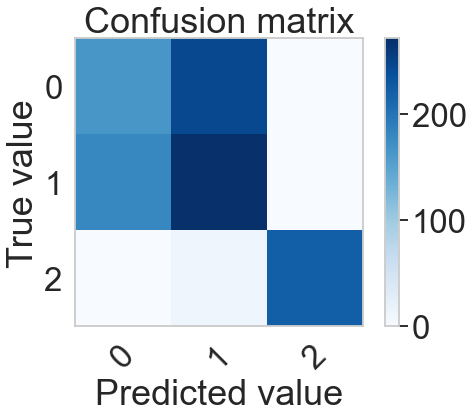

In [38]:
confusion_matrix_plot(cm, names=[0,1,2]);

In [39]:
print(classification_report(df_subset['class'], prob_class,labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.22      0.16      0.19      1011
           1       0.28      0.24      0.26      1120
           2       0.64      0.21      0.32      1047

   micro avg       0.32      0.21      0.25      3178
   macro avg       0.38      0.21      0.26      3178
weighted avg       0.38      0.21      0.26      3178

